<a href="https://colab.research.google.com/github/Niroth36/Machine_Learning_Project/blob/main/it21395first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries we need

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

## Importing dataset (.csv file)

In [50]:
url = "https://raw.githubusercontent.com/Niroth36/Machine_Learning_Project/main/fetal_health.csv"
dataset = pd.read_csv(url)

## Total number of columns and raws

In [ ]:
dataset.shape

(2126, 22)

## Checking data (5 first lines)

In [51]:
dataset.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Checking data type of dataset

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## Descriptive statistics for the dataset and .T to change raws with columns and the opposite

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Depecting the counts of observations for the three values of fetal_health column to see if the dataset is balanced.

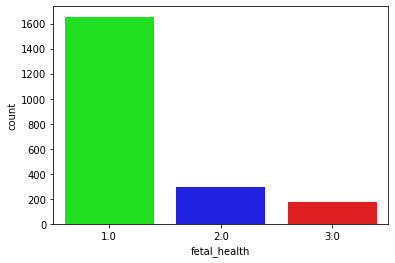

In [53]:
colours=["#00FF00","#0000FF", "#FF0000"]
sns.countplot(data= dataset, x="fetal_health",palette=colours)

## In this case as the countplot shows we have an imbalanced data and this could lead to misleading classification accuracy. So we are going to use some performance measures to give us a better insight, such as:
- Correlation Matrix
- Precision
- Recall
- F1 score

## In this case we will use only the correlation matrix.

## Drawing boxplot for every characteristic of the dataset.

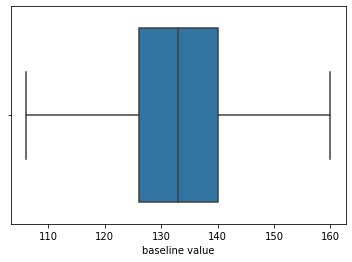

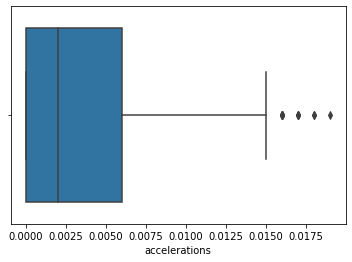

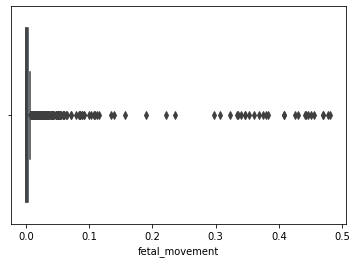

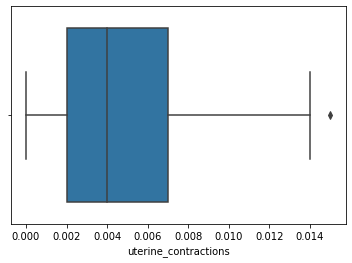

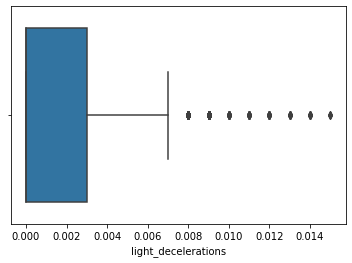

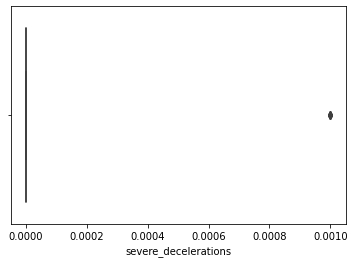

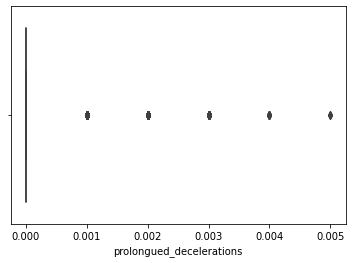

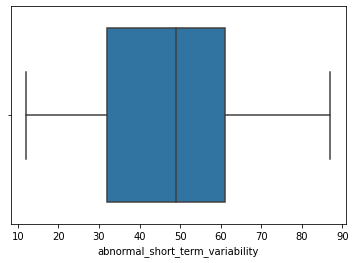

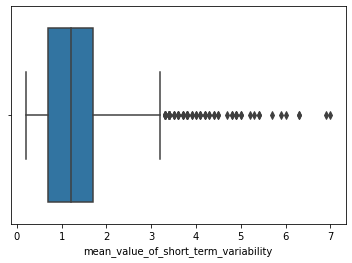

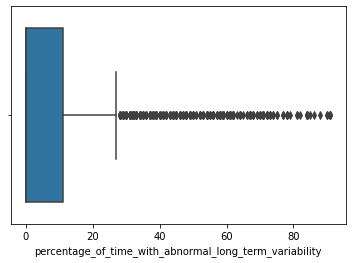

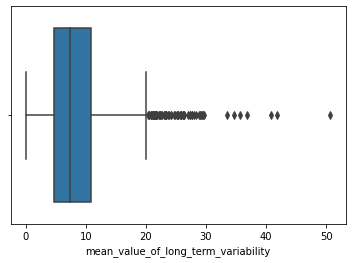

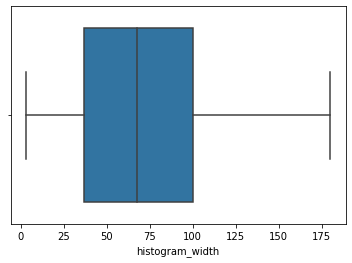

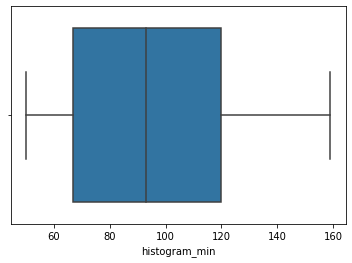

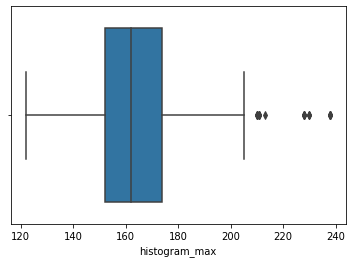

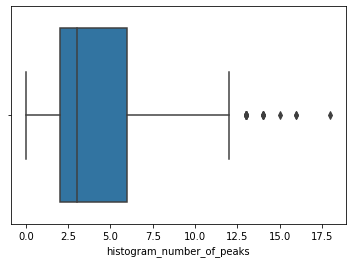

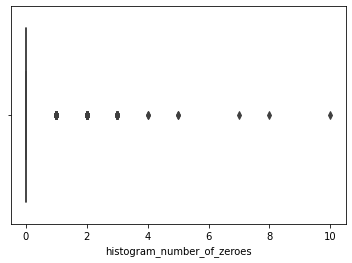

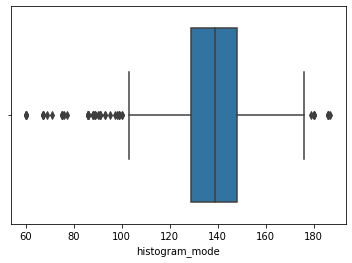

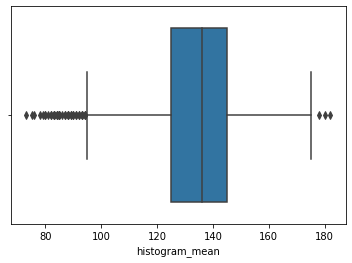

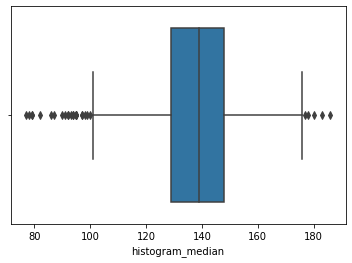

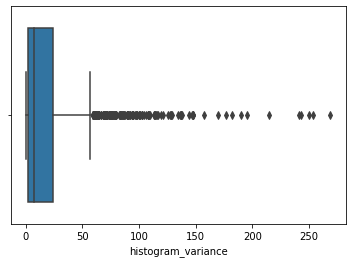

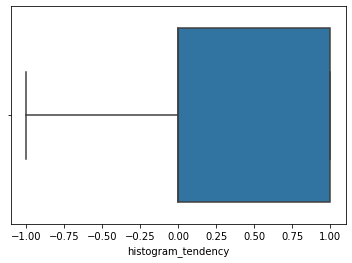

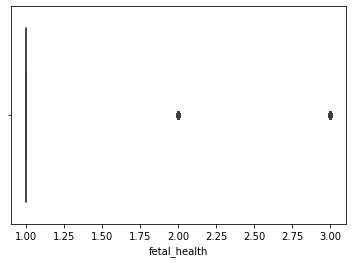

In [ ]:
# sns.boxplot(data = dataset, x = 'abnormal_short_term_variability', y = 'fetal_health')
for column in dataset.columns:
  plt.figure()
  plt.tight_layout()
  sns.boxplot(x=dataset[column])
  plt.show()
  # sns.histplot(x=dataset[column])

## Producing histogram for all the characteristics of the dataset.

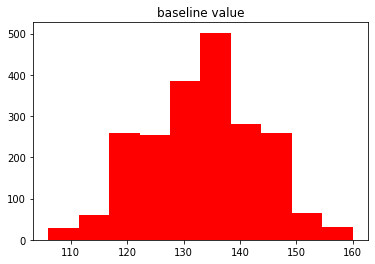

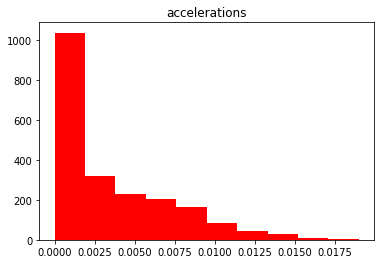

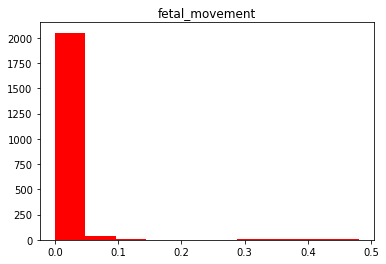

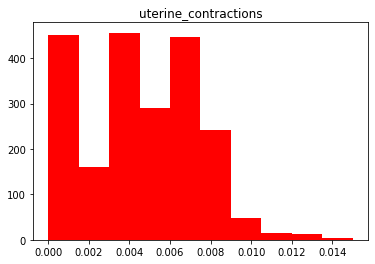

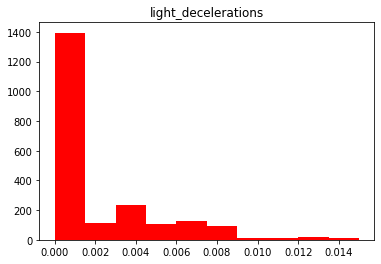

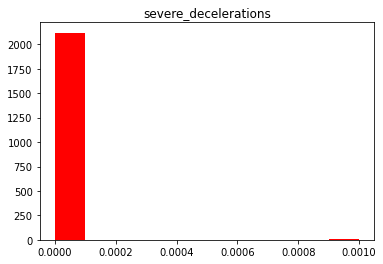

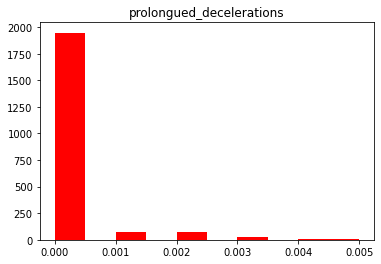

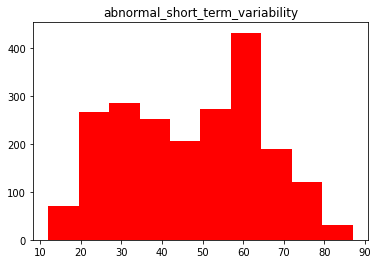

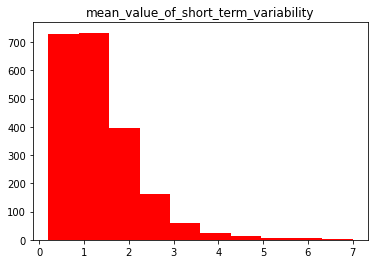

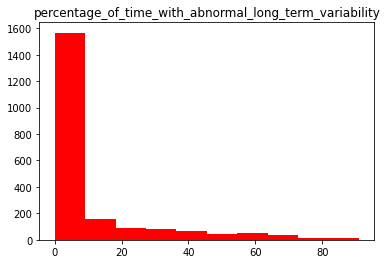

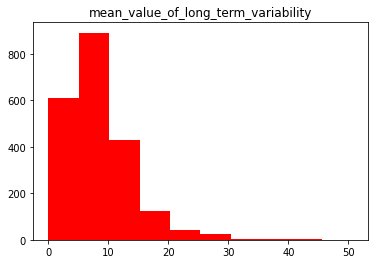

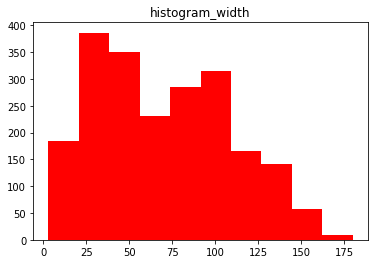

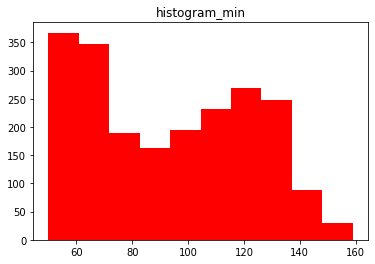

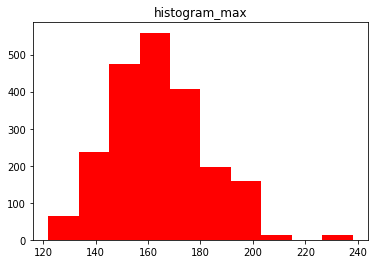

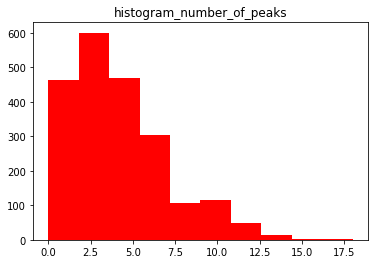

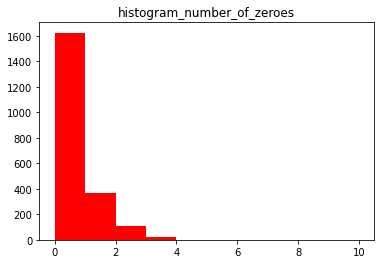

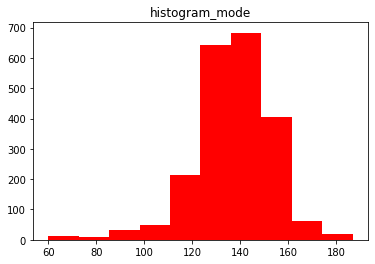

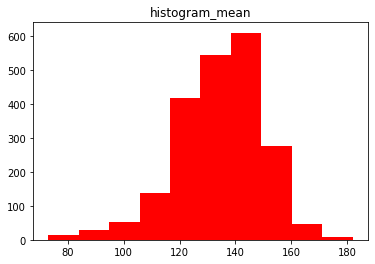

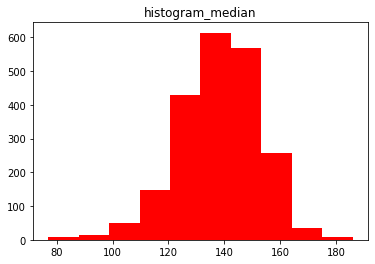

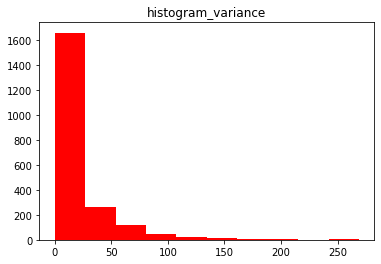

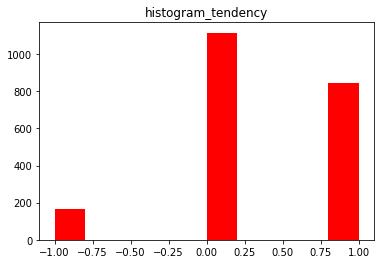

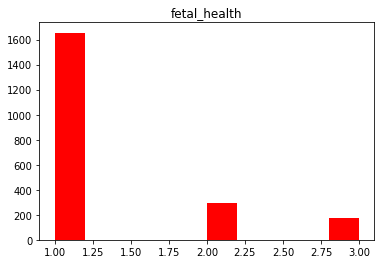

In [ ]:
for column in dataset.columns:
  plt.hist(x=dataset[column], color = 'red')
  plt.title(column)
  plt.show()

## Calculating correlation matrix.

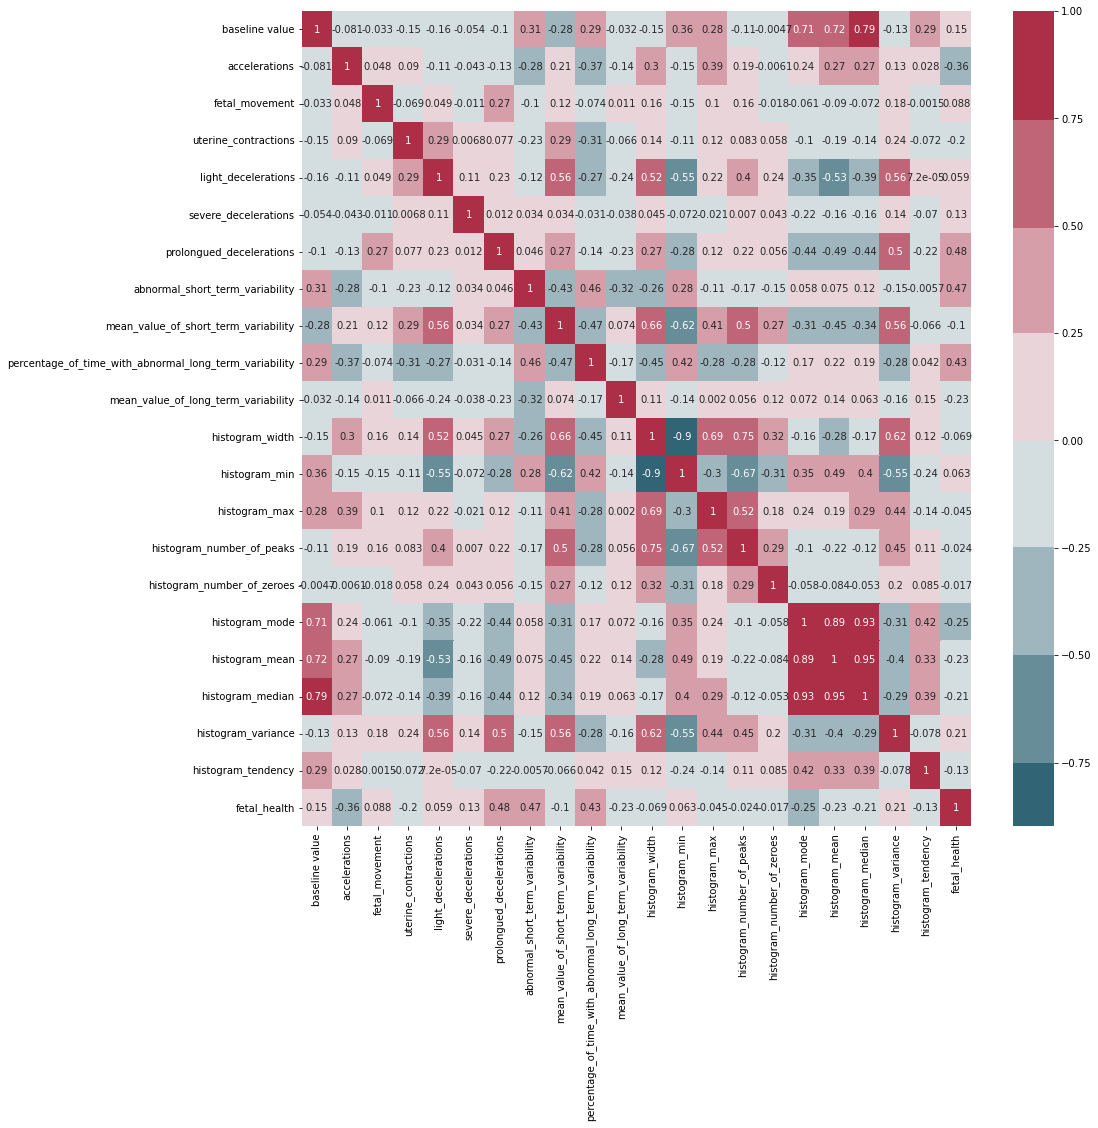

In [ ]:
corrmat= dataset.corr()
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(220, 5, s=75, l=40, n=8, center = "light", as_cmap=False)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

## Checking if there are null values in the dataset

In [ ]:
dataset.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

## Visualizing data completeness. Because all columns have value 1.0 in y-axis this means that they have 100% data completeness.

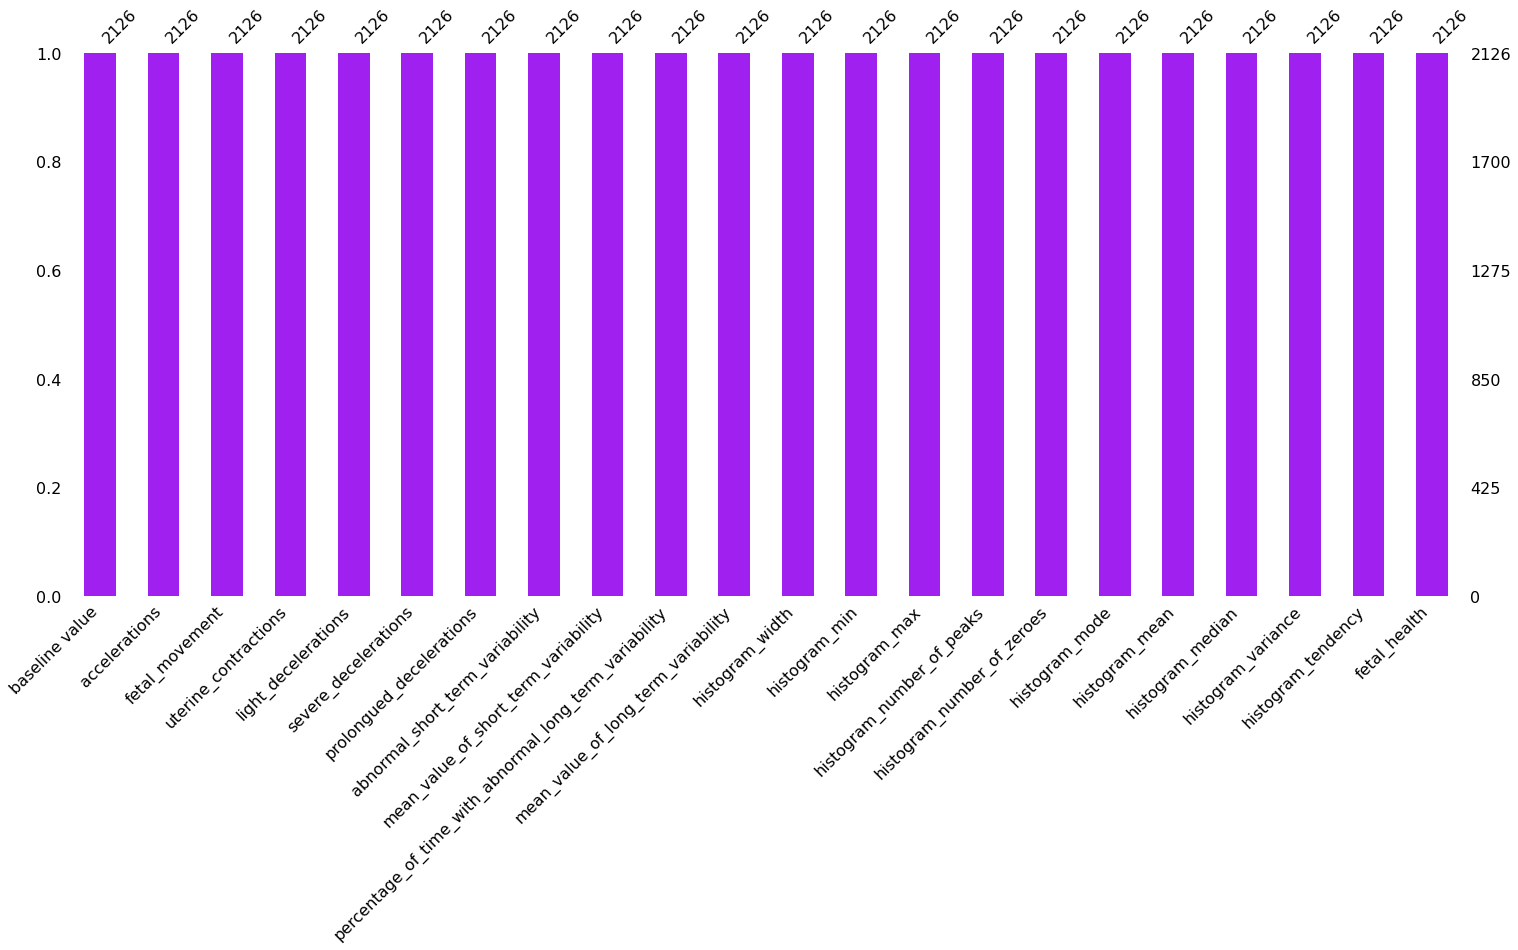

In [ ]:
import missingno as msno
msno.bar(dataset,color = "#A020F0")

## Data is colored and there are no white spaces. That means that there is 100% data completeness.

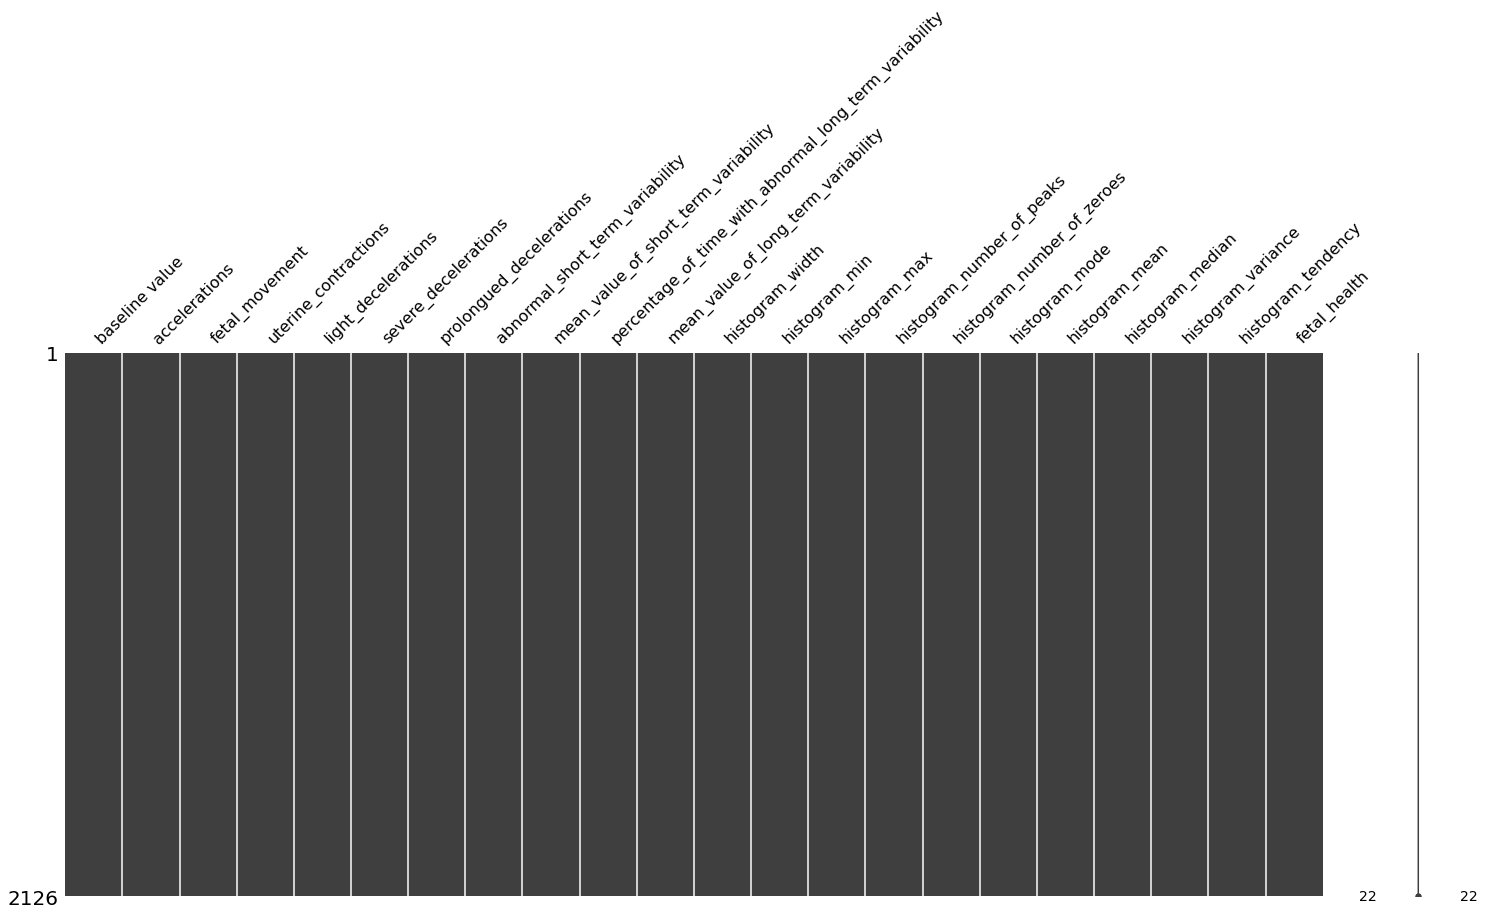

In [ ]:
msno.matrix(dataset)

## Make preprocessing function for a given dataset

In [ ]:
from sklearn import model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def data_preprocessing(df):
  # Split dataset into X values and y labels
  X=df.drop(["fetal_health"],axis=1)
  y=df["fetal_health"]
  
  # Split dataset into train and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

  # Implement Standard Scaling to X_train and X_test values
  col_names1 = list(X_test.columns)
  s_scaler1 = preprocessing.StandardScaler()
  X_test_std= s_scaler1.fit_transform(X_test)
  X_test_std = pd.DataFrame(X_test_std, columns=col_names1)

  col_names = list(X_train.columns)
  s_scaler = preprocessing.StandardScaler()
  s_scaler.fit(X_train)
  X_train_std = s_scaler.transform(X_train)
  X_train_std = pd.DataFrame(X_train_std, columns=col_names)

  return X_train_std, X_test_std, y_train, y_test

In [67]:
X_train, X_test, y_train, y_test = data_preprocessing(dataset)

## Looking at the scaled features of the train set.

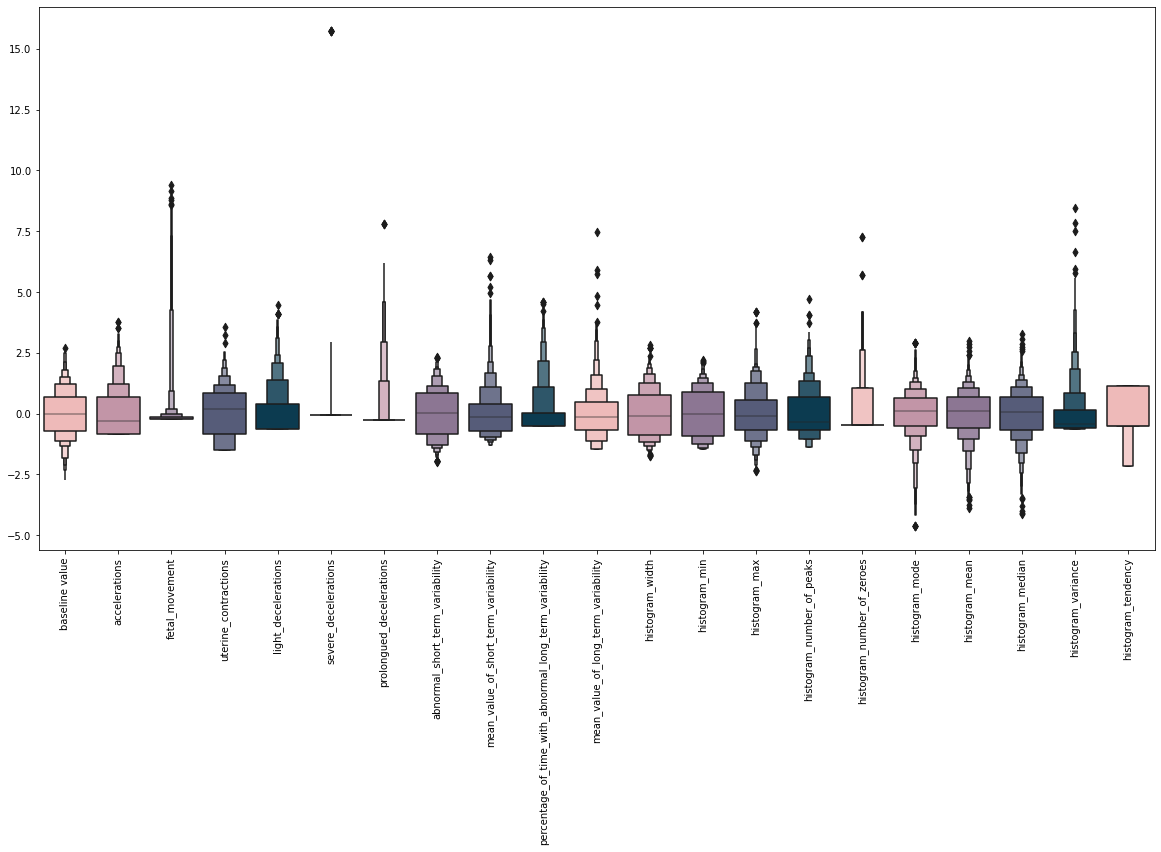

In [69]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_train,palette = shades)
plt.xticks(rotation=90)
plt.show()

## Looking at the scaled features of the test set

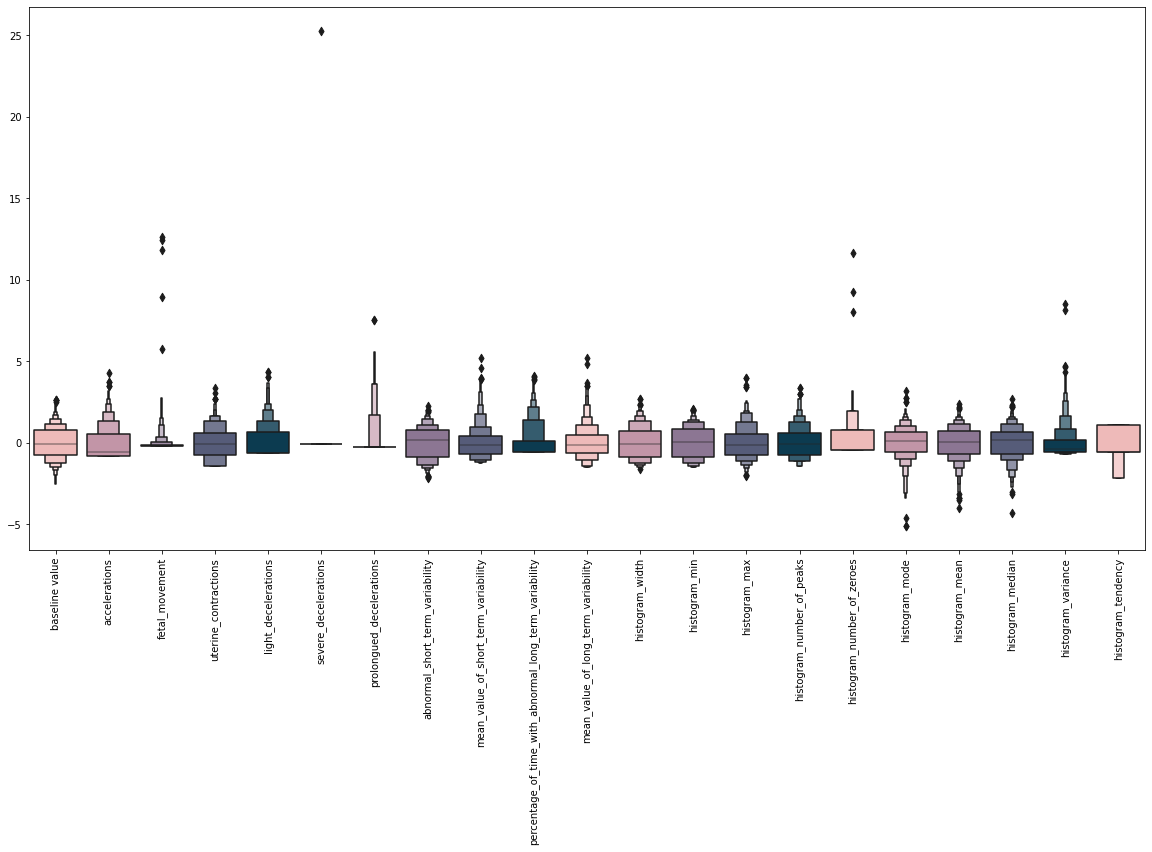

In [70]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_test,palette = shades)
plt.xticks(rotation=90)
plt.show()

## Developing Linear Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [73]:
def run_linear_sklearn(X_train, X_test, y_train, y_test):
    # Create a linear model
    model = LogisticRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, cm

In [74]:
accuracy, cm = run_linear_sklearn(X_train, X_test, y_train, y_test)

In [75]:
print(accuracy)

0.8840125391849529


## Accuracy 0.849 for Logistic Regression with sklearn

In [84]:
print(cm)

[[470  19   7]
 [ 30  61  10]
 [  3   5  33]]


## Plotting Confusion Matrix

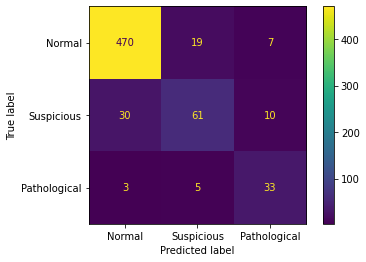

In [76]:
labels = ['Normal', 'Suspicious', 'Pathological']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

## Confusion Matrix Analysis
- Model Normal Predictions: 467 correct predictions and 53 + 4 = 57 wrong predictions.
- Model Suspicious Predictions: 42 correct predictions and 17 + 4 = 21 wrong predictions.
- Model Pathological Predictions: 33 correct predictions and 12 + 6 = 18 wrong predictions
- The model was right in 467 + 42 + 33 = 542 predictions and wrong in 57 + 21 + 18 = 96
- The accuracy is 542 correct predictions divided by 542 + 96 = 638 the number of total predictions.
- Accuracy = 542/638 = 0,849 = 84,9%

In [ ]:
dataset.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [77]:
dataset.shape

(2126, 22)

## An attempt to achieve better accuracy by deleting the duplicate values.

In [78]:
new_df = dataset.drop_duplicates()
new_df.shape

(2113, 22)

In [79]:
X_train_new, X_test_new, y_train_new, y_test_new = data_preprocessing(new_df)
accuracy_new, cm_new = run_linear_sklearn(X_train_new, X_test_new, y_train_new, y_test_new)

In [82]:
print(accuracy_new)

0.9022082018927445


## By dropping duplicate values we achieve a better accuracy: 90,2%

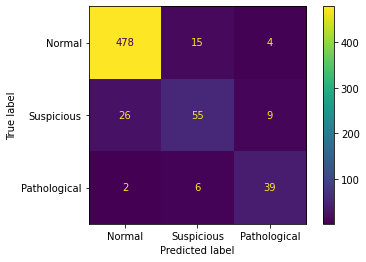

In [83]:
labels = ['Normal', 'Suspicious', 'Pathological']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=labels)
disp.plot()
plt.show()

## Developing Linear Model with Tensorflow

In [65]:
def run_linear_tf(X_train, X_test, y_train, y_test):
    # Convert the training and test data to tensors
    X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
    X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
    y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
    y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

    # Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[X_train.shape[1]])
    ])

    # Compile the model with the SGD optimizer
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                  loss="SparseCategoricalCrossentropy")

    # Fit the model to the training data
    model.fit(X_train, y_train, epochs=50, batch_size=128)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy
    accuracy = tf.keras.metrics.Accuracy()
    accuracy.update_state(y_test, y_pred)
    accuracy = accuracy.result().numpy()

    # Calculate the confusion matrix
    cm = tf.math.confusion_matrix(y_test, y_pred).numpy()

    return accuracy, cm

In [ ]:
accuracy, cm = run_linear_tf(X_train, X_test, y_train, y_test)

In [ ]:
print("Test loss:", accuracy[0])
print("Test accuracy:", accuracy[1])